In [ ]:
import sys, os

# Parallize
try:
    from mpi4py import MPI
    comm = MPI.COMM_WORLD
    rank = comm.Get_rank()
    size = comm.Get_size()
except ImportError:
    rank = 0
    size = 1

import py21cmfast as p21c

if rank == 0:
    default_cache_direc = p21c.config['direc']
    if os.path.exists(default_cache_direc) and not os.path.exists(default_cache_direc/'wisdoms'):
        os.mkdir(default_cache_direc/'wisdoms')

import shutil

import multiprocessing
from multiprocessing import Pool

import matplotlib.pyplot as plt
from scipy.stats import qmc
import numpy as np
import glob
import h5py
import fcntl
import time

In [2]:
str_pad_len = 80
str_pad_type = '-'
cache_direc = "_cache" + str(rank)

if not os.path.exists(cache_direc):
    os.mkdir(cache_direc)
p21c.config['direc'] = cache_direc

In [5]:
import py21cmfast as p21c
from py21cmfast import plotting
import os
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
import numpy as np
from scipy.spatial.transform import Rotation
from astropy import units as un
%matplotlib inline

print(f"21cmFAST version is {p21c.__version__}")

21cmFAST version is 3.3.1


In [8]:
user_params = p21c.UserParams(
    HII_DIM=64, BOX_LEN=256, KEEP_3D_VELOCITIES=True
)


In [ ]:
# lcn = p21c.RectilinearLightconer.with_equal_cdist_slices(
#     min_redshift=7.0,
#     max_redshift=12.0,
#     quantities=('brightness_temp', 'density', 'velocity_z'),
#     resolution=user_params.cell_size,
#     # index_offset=0,
# )

In [29]:
p21c.run_lightcone?

Signature:
p21c.run_lightcone(
    *,
    redshift=None,
    max_redshift=None,
    user_params=None,
    cosmo_params=None,
    astro_params=None,
    flag_options=None,
    regenerate=None,
    write=None,
    lightcone_quantities=('brightness_temp',),
    global_quantities=('brightness_temp', 'xH_box'),
    direc=None,
    init_box=None,
    perturb=None,
    random_seed=None,
    coeval_callback=None,
    coeval_callback_redshifts=1,
    use_interp_perturb_field=False,
    cleanup=True,
    hooks=None,
    always_purge: 'bool' = False,
    **global_kwargs,
)
Docstring:
Evaluate a full lightcone ending at a given redshift.

This is generally the easiest and most efficient way to generate a lightcone, though it can
be done manually by using the lower-level functions which are called by this function.

Parameters
----------
redshift : float
    The minimum redshift of the lightcone.
max_redshift : float, optional
    The maximum redshift at which to keep lightcone information. By defa

In [11]:
lightcone = p21c.run_lightcone(
    redshift=8,
    max_redshift=15,
    user_params=user_params,
    lightcone_quantities=('brightness_temp',),
)

/storage/home/hcoda1/3/bxia34/.conda/envs/21cmFAST/lib/python3.9/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/storage/home/hcoda1/3/bxia34/.conda/envs/21cmFAST/lib/python3.9/site-packages/py21cmfast/inputs.py:491: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
/storage/home/hcoda1/3/bxia34/.conda/envs/21cmFAST/lib/python3.9/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/storage/home/hcoda1/3/bxia34/.conda/envs/21cmFAST/lib/python3.9/site-packages/py21cmfast/_utils.py:815: User

In [12]:
lightcone

In [17]:
lightcone.__dict__.keys()

dict_keys(['redshift', 'random_seed', 'user_params', 'cosmo_params', 'astro_params', 'flag_options', 'node_redshifts', 'cache_files', 'log10_mturnovers', 'log10_mturnovers_mini', 'global_params', 'global_brightness_temp', 'global_xH', 'photon_nonconservation_data', 'brightness_temp', 'global_quantities', 'lightcones'])

In [18]:
lightcone.redshift

8

In [19]:
lightcone.global_brightness_temp

array([34.55752945, 34.16397476, 33.76196289, 33.34915543, 32.92404556,
       32.48389816, 32.02748871, 31.55088806, 31.05317879, 30.53141785,
       29.98341942, 29.40883255, 28.80299568, 28.16443825, 27.49140549,
       26.78466415, 26.04241753, 25.26169968, 24.44268608, 23.58415985,
       22.68849564, 21.75668335, 20.78304482, 19.77217674, 18.73151016,
       17.65027237, 16.53850937, 15.39212132, 14.2091341 , 13.01807213,
       11.81742001])

In [21]:
lightcone.brightness_temp.shape

(64, 64, 332)

In [24]:
lightcone.global_quantities.keys()

dict_keys(['brightness_temp', 'xH_box'])

In [26]:
lightcone.lightcones.keys()

dict_keys(['brightness_temp'])

In [28]:
lightcone.global_quantities['brightness_temp']

array([34.55752945, 34.16397476, 33.76196289, 33.34915543, 32.92404556,
       32.48389816, 32.02748871, 31.55088806, 31.05317879, 30.53141785,
       29.98341942, 29.40883255, 28.80299568, 28.16443825, 27.49140549,
       26.78466415, 26.04241753, 25.26169968, 24.44268608, 23.58415985,
       22.68849564, 21.75668335, 20.78304482, 19.77217674, 18.73151016,
       17.65027237, 16.53850937, 15.39212132, 14.2091341 , 13.01807213,
       11.81742001])

In [31]:
lightcone.lightcones['brightness_temp'].shape

(64, 64, 332)

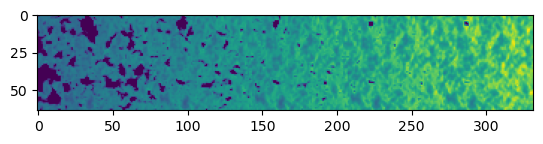

In [35]:
plt.imshow(lightcone.lightcones['brightness_temp'][0])
plt.show()

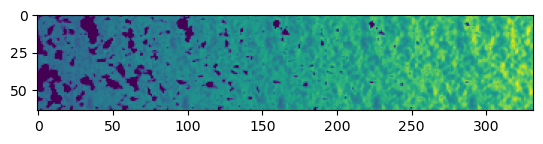

In [36]:
plt.imshow(lightcone.lightcones['brightness_temp'][1])
plt.show()

In [38]:
for i in range(lightcone.lightcones['brightness_temp'].shape[0]):
    plt.imshow(lightcone.lightcones['brightness_temp'][i])
    plt.savefig(f"lightcone_{i:03d}.png")
    plt.close()

In [39]:
for i in range(lightcone.lightcones['brightness_temp'].shape[-1]):
    plt.imshow(lightcone.lightcones['brightness_temp'][:,:,i])
    plt.savefig(f"coeval_{i:03d}.png")
    plt.close()